In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
#import matplotlib.colors as mcolors
#import colorsys

labelfont = FontProperties()
labelfont.set_family('serif')
labelfont.set_name('Times New Roman')
labelfont.set_size(16)

axislabelfont = FontProperties()
axislabelfont.set_family('serif')
axislabelfont.set_name('Times New Roman')
axislabelfont.set_size(22)

tickfont = FontProperties()
tickfont.set_family('serif')
tickfont.set_name('Times New Roman')
tickfont.set_size(16)

axisfontsize = 16
labelfontsize = 16

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [3]:
def single_layer(pos, radius, view_angle=np.pi/6., thickness=0.5):
    #x_scan = np.linspace(-radius, radius, 101)
    alpha_scan = np.linspace(0., 2.*np.pi, 361)
    alpha_half = np.linspace(-np.pi/2, np.pi/2, 181)
    plt.plot(pos[0]+(radius*np.sin(alpha_scan))*np.sin(view_angle), pos[1]+radius*np.cos(alpha_scan), 'k')
    plt.plot(pos[0]+(thickness+radius*np.sin(alpha_scan))*np.sin(view_angle), pos[1]+radius*np.cos(alpha_scan), 'k', zorder=-1)
    plt.plot(pos[0]+(radius*0.5*np.sin(alpha_scan))*np.sin(view_angle), pos[1]+radius*0.5*np.cos(alpha_scan), 'k')
    plt.plot(pos[0]+(thickness+radius*0.5*np.sin(alpha_scan))*np.sin(view_angle), pos[1]+radius*0.5*np.cos(alpha_scan), 'k', zorder=-1)
    plt.plot([pos[0], pos[0]+(thickness)*np.sin(view_angle)], [pos[1]+radius, pos[1]+radius], 'k')
    plt.plot([pos[0], pos[0]+(thickness)*np.sin(view_angle)], [pos[1]-radius, pos[1]-radius], 'k')
    for ang in [0., np.pi/3., np.pi*2./3.]:
        plt.plot([pos[0]+(radius*np.sin(ang))*np.sin(view_angle), pos[0]+(radius*np.sin(np.pi+ang))*np.sin(view_angle)],
                [pos[1]+radius*np.cos(ang), pos[1]+radius*np.cos(ang+np.pi)], 'k')
        if ang != 0.:
            plt.plot([pos[0]+(radius*np.sin(ang))*np.sin(view_angle), pos[0]+(radius*np.sin(ang)+thickness)*np.sin(view_angle)],
                    [pos[1]+radius*np.cos(ang), pos[1]+radius*np.cos(ang)], 'k')

    plt.fill_between(pos[0]+(radius*np.sin(alpha_half))*np.sin(view_angle), 
                     pos[1]+radius*np.cos(alpha_half), 
                     pos[1]-radius*np.cos(alpha_half), color='white')

def energy_label(pos, label):
    scaling = 2.
    upper_end = pos[1]+0.5
    plt.plot([pos[0], pos[0]], [pos[1], upper_end-0.025], 'k') #new shift in v3
    plt.plot([pos[0]-0.125/scaling, pos[0], pos[0]+0.125/scaling], [upper_end-0.25/scaling, upper_end, upper_end-0.25/scaling], 'k')
    plt.text(pos[0], upper_end+0.125, label, ha='center', va='bottom')

def voxel_label(pos, label):
    scaling = 2.
    lower_end = pos[1]-0.5
    plt.plot([pos[0], pos[0]], [pos[1], lower_end+0.025], 'k') #new shift in v3
    plt.plot([pos[0]-0.125/scaling, pos[0], pos[0]+0.125/scaling], [lower_end+0.25/scaling, lower_end, lower_end+0.25/scaling], 'k')
    plt.text(pos[0], lower_end-0.125, label, ha='center', va='top')

def draw_box(lower_left, upper_right, radius, label, color):
    angle_scan = np.linspace(0., np.pi/2., 91)
    plt.plot([lower_left[0]+radius, upper_right[0]-radius], [lower_left[1], lower_left[1]],color=color)
    plt.plot([lower_left[0]+radius, upper_right[0]-radius], [upper_right[1], upper_right[1]],color=color)
    plt.plot([lower_left[0], lower_left[0]], [lower_left[1]+radius, upper_right[1]-radius],color=color)
    plt.plot([upper_right[0], upper_right[0]], [lower_left[1]+radius, upper_right[1]-radius],color=color)
    plt.plot(radius*np.sin(angle_scan) + upper_right[0] - radius, radius*np.cos(angle_scan)+upper_right[1]-radius,color=color)
    plt.plot(radius*np.sin(angle_scan+np.pi/2) + upper_right[0] - radius, radius*np.cos(angle_scan+np.pi/2)+lower_left[1]+radius,color=color)
    plt.plot(radius*np.sin(angle_scan+np.pi) + lower_left[0] + radius, radius*np.cos(angle_scan+np.pi)+lower_left[1]+radius,color=color)
    plt.plot(radius*np.sin(angle_scan+np.pi/2+np.pi) + lower_left[0] + radius, radius*np.cos(angle_scan+np.pi/2+np.pi)+upper_right[1]-radius,color=color)
    plt.text(*((lower_left+upper_right)*0.5), label, ha='center', va='center')
    plt.fill_between([*(radius*np.sin(angle_scan+np.pi/2+np.pi) + lower_left[0] + radius), 
                      lower_left[0]+radius, upper_right[0]-radius, *(radius*np.sin(angle_scan) + upper_right[0] - radius)], 
                    [*(radius*np.cos(angle_scan+np.pi/2+np.pi)+upper_right[1]-radius),
                     lower_left[1], lower_left[1], *(radius*np.cos(angle_scan)+upper_right[1]-radius)],
                    [*(radius*np.cos(-angle_scan+np.pi/2+np.pi)+lower_left[1]+radius),
                     upper_right[1], upper_right[1], *(radius*np.cos(-angle_scan+np.pi)+lower_left[1]+radius)],
                     color=color, alpha=0.3, edgecolor=None)


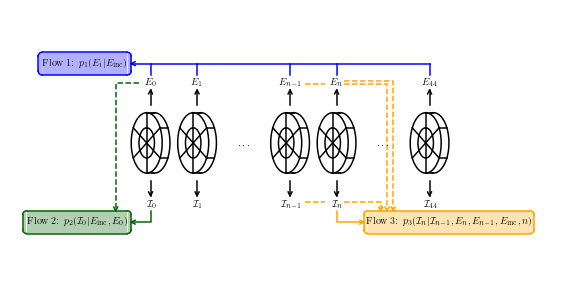

In [221]:
# version 1
plt.figure(figsize=(10,5))
my_labels = ['0', '1', 'n-1', 'n', '44']
for idx, loc in enumerate([-4.5, -3., -0., 1.5, 4.5]):
    single_layer((loc, 0.), 1.)
    energy_label((loc+0.125, 1.25), r'$E_{'+my_labels[idx]+'}$')
    voxel_label((loc+0.125, -1.25), r'$\mathcal{I}_{'+my_labels[idx]+'}$')
    plt.plot([loc+0.125, loc+0.125], [2.25, 2.625], 'blue')

plt.plot([4.625, -5], [2.625, 2.625], 'blue')
plt.plot([-5+0.25/2., -5., -5+0.25/2.], [2.625-0.125/2., 2.625, 2.625+0.125/2.], 'b')

plt.plot([-4.5+0.125, -4.5+0.125, -5.], [-2.25, -2.625, -2.625], 'darkgreen')
plt.plot([-5+0.25/2., -5., -5+0.25/2.], [-2.625-0.125/2., -2.625, -2.625+0.125/2.], 'darkgreen')

plt.plot([-4.75, -5.5, -5.5], [2., 2., -2.25], 'darkgreen', ls='dashed')
plt.plot([-5.5-0.125/2., -5.5, -5.5+0.125/2.], [-2.25+0.25/2., -2.25, -2.25+0.25/2.], 'darkgreen')

plt.plot([0.6, 1.25], [1.95, 1.95], 'orange', ls='dashed')
plt.plot([1.85, 3.25, 3.25], [1.95, 1.95, -2.25], 'orange', ls='dashed')
plt.plot([1.85, 3.45, 3.45], [2.05, 2.05, -2.25], 'orange', ls='dashed')
plt.plot([3.25-0.125/2., 3.25, 3.25+0.125/2.], [-2.25+0.25/2., -2.25, -2.25+0.25/2.], 'orange')
plt.plot([3.45-0.125/2., 3.45, 3.45+0.125/2.], [-2.25+0.25/2., -2.25, -2.25+0.25/2.], 'orange')

plt.plot([0.6, 1.25], [-1.95, -1.95], 'orange', ls='dashed')
plt.plot([1.85, 3.05, 3.05], [-1.95, -1.95, -2.25], 'orange', ls='dashed')
plt.plot([3.05-0.125/2., 3.05, 3.05+0.125/2.], [-2.25+0.25/2., -2.25, -2.25+0.25/2.], 'orange')

plt.plot([1.625, 1.625, 2.5], [-2.25, -2.625, -2.625], 'orange')
plt.plot([2.5-0.25/2., 2.5, 2.5-0.25/2.], [-2.625+0.125/2., -2.625, -2.625-0.125/2.], 'orange')

for loc in [-1.5, 3.]:
    plt.text(loc+0.125, 0., r'\dots', ha='center', va='center')
    

draw_box(np.array([-8., 2.25]), np.array([-5., 3.]), 0.125, 'Flow 1: '+r'$p_1(E_{i}|E_{\text{inc}})$', 'blue')
draw_box(np.array([-8.5, -3.]), np.array([-5., -2.25]), 0.125, 
         'Flow 2: '+r'$p_2(\mathcal{I}_{0}|E_{\text{inc}}, E_{0})$', 'darkgreen')
draw_box(np.array([2.5, -3.]), np.array([8., -2.25]), 0.125, 
         'Flow 3: '+r'$p_3(\mathcal{I}_{n}|\mathcal{I}_{n-1}, E_{n}, E_{n-1}, E_{\text{inc}}, n)$', 'orange')

plt.xlim(-9, 9)
plt.ylim(-4.5, 4.5)
plt.gca().axis('off')
plt.savefig('iCaloflow.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


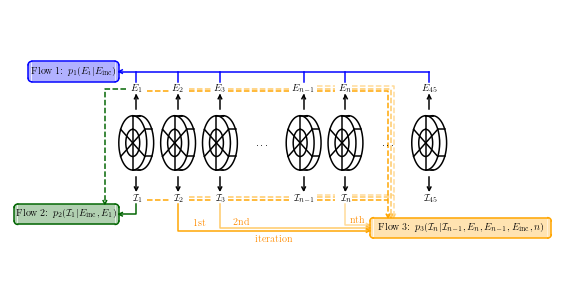

In [68]:
# version 2
plt.figure(figsize=(10,5))
my_labels = ['1', '2', '3', 'n-1', 'n', '45']
for idx, loc in enumerate([-4.5, -3., -1.5, 1.5, 3., 6.0]):
    single_layer((loc, 0.), 1.)
    energy_label((loc+0.125, 1.25), r'$E_{'+my_labels[idx]+'}$')
    voxel_label((loc+0.125, -1.25), r'$\mathcal{I}_{'+my_labels[idx]+'}$')
    plt.plot([loc+0.125, loc+0.125], [2.25, 2.625], 'blue')

plt.plot([6.125, -5], [2.625, 2.625], 'blue')
plt.plot([-5+0.25/2., -5., -5+0.25/2.], [2.625-0.125/2., 2.625, 2.625+0.125/2.], 'b')

plt.plot([-4.5+0.125, -4.5+0.125, -5.], [-2.25, -2.625, -2.625], 'darkgreen')
plt.plot([-5+0.25/2., -5., -5+0.25/2.], [-2.625-0.125/2., -2.625, -2.625+0.125/2.], 'darkgreen')

plt.plot([-4.75, -5.5, -5.5], [2., 2., -2.25], 'darkgreen', ls='dashed')
plt.plot([-5.5-0.125/2., -5.5, -5.5+0.125/2.], [-2.25+0.25/2., -2.25, -2.25+0.25/2.], 'darkgreen')

plt.plot([2.1, 2.75], [2.1, 2.1], 'orange', ls='dashed', alpha=0.4)
plt.plot([3.35, 4.85, 4.85], [2.1, 2.1, -2.75], 'orange', ls='dashed', alpha=0.4)
plt.plot([2.1, 2.75], [-1.9, -1.9], 'orange', ls='dashed', alpha=0.4)
plt.plot([3.35, 4.85], [-1.9, -1.9], 'orange', ls='dashed', alpha=0.4)
#plt.plot([1.85, 3.45, 3.45], [2.05, 2.05, -2.25], 'orange', ls='dashed', alpha=0.4)
plt.plot([4.85-0.125/2., 4.85, 4.85+0.125/2.], [-2.75+0.25/2., -2.75, -2.75+0.25/2.], 'orange', alpha=0.4)
#plt.plot([3.45-0.125/2., 3.45, 3.45+0.125/2.], [-2.25+0.25/2., -2.25, -2.25+0.25/2.], 'orange', alpha=0.4)

plt.plot([-2.5, -1.7], [2.0, 2.0], 'orange', ls='dashed', alpha=0.6)
plt.plot([-1.1, 1.1], [2.0, 2.0], 'orange', ls='dashed', alpha=0.6)
plt.plot([2.1, 2.75], [2., 2.], 'orange', ls='dashed', alpha=0.6)
plt.plot([3.35, 4.75, 4.75], [2.0, 2.0, -2.75], 'orange', ls='dashed', alpha=0.6)
plt.plot([-2.5, -1.7], [-2.0, -2.0], 'orange', ls='dashed', alpha=0.6)
plt.plot([-1.1, 1.1], [-2.0, -2.0], 'orange', ls='dashed', alpha=0.6)
plt.plot([2.1, 2.75], [-2., -2.], 'orange', ls='dashed', alpha=0.6)
plt.plot([3.35, 4.75], [-2.0, -2.0], 'orange', ls='dashed', alpha=0.6)
plt.plot([4.75-0.125/2., 4.75, 4.75+0.125/2.], [-2.75+0.25/2., -2.75, -2.75+0.25/2.], 'orange', alpha=0.6)

plt.plot([-4, -3.2], [1.9, 1.9], 'orange', ls='dashed')
plt.plot([-2.5, -1.7], [1.9, 1.9], 'orange', ls='dashed')
plt.plot([-1.1, 1.1], [1.9, 1.9], 'orange', ls='dashed')
plt.plot([2.1, 2.75], [1.9, 1.9], 'orange', ls='dashed')
plt.plot([3.35, 4.65, 4.65], [1.9, 1.9, -2.75], 'orange', ls='dashed')
plt.plot([-4, -3.2], [-2.1, -2.1], 'orange', ls='dashed')
plt.plot([-2.5, -1.7], [-2.1, -2.1], 'orange', ls='dashed')
plt.plot([-1.1, 1.1], [-2.1, -2.1], 'orange', ls='dashed')
plt.plot([2.1, 2.75], [-2.1, -2.1], 'orange', ls='dashed')
plt.plot([3.35, 4.65], [-2.1, -2.1], 'orange', ls='dashed')
plt.plot([4.65-0.125/2., 4.65, 4.65+0.125/2.], [-2.75+0.25/2., -2.75, -2.75+0.25/2.], 'orange')


plt.plot([-2.875, -2.875, 4.], [-2.25, -3.225, -3.225], 'orange')
plt.plot([4.-0.25/2., 4., 4.-0.25/2.], [-3.225+0.125/2., -3.225, -3.225-0.125/2.], 'orange')
plt.text(0.5626, -3.425, 'iteration', ha='center', va='top', color='darkorange')
plt.text(-2.125, -3.125, '1st', ha='center', va='bottom', color='darkorange')

plt.plot([-1.375, -1.375, 4.], [-2.25, -3.125, -3.125], 'orange', alpha=0.6)
plt.plot([4.-0.25/2., 4., 4.-0.25/2.], [-3.125+0.125/2., -3.125, -3.125-0.125/2.], 'orange', alpha=0.6)
plt.text(-0.625, -3.075, '2nd', ha='center', va='bottom', color='darkorange')

plt.plot([3.125, 3.125, 4.], [-2.25, -3.025, -3.025], 'orange', alpha=0.4)
plt.plot([4.-0.25/2., 4., 4.-0.25/2.], [-3.025+0.125/2., -3.025, -3.025-0.125/2.], 'orange', alpha=0.4)
plt.text(3.5625, -3.025, 'nth', ha='center', va='bottom', color='darkorange')

for loc in [0., 4.5]:
    plt.text(loc+0.125, 0., r'\dots', ha='center', va='center')
    

draw_box(np.array([-8.25, 2.25]), np.array([-5., 3.]), 0.125, 'Flow 1: '+r'$p_1(E_{i}|E_{\text{inc}})$', 'blue')
draw_box(np.array([-8.75, -3.]), np.array([-5., -2.25]), 0.125, 
         'Flow 2: '+r'$p_2(\mathcal{I}_{1}|E_{\text{inc}}, E_{1})$', 'darkgreen')
draw_box(np.array([4.0, -3.5]), np.array([10.5, -2.75]), 0.125, 
         'Flow 3: '+r'$p_3(\mathcal{I}_{n}|\mathcal{I}_{n-1}, E_{n}, E_{n-1}, E_{\text{inc}}, n)$', 'orange')

plt.xlim(-9, 11)
plt.ylim(-5, 5)
plt.gca().axis('off')
plt.savefig('iCaloflow_v2.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


luatex: /home/claudius/miniconda3/envs/tf-madnis/lib/libcurl.so.4: no version information available (required by /usr/bin/../lib/../lib/libmiktex-packagemanager.so.10)


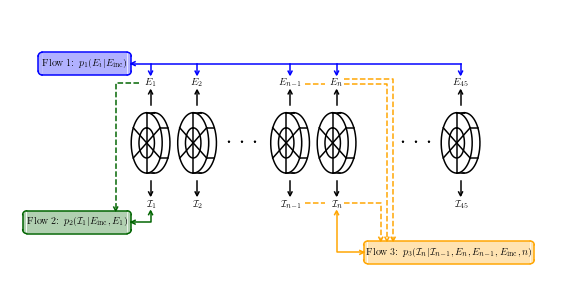

In [4]:
# version 3, adapted from Ian (see illustration_Ian notebook)
plt.figure(figsize=(10,5))
my_labels = ['1', '2', 'n-1', 'n', '45']
for idx, loc in enumerate([-4.5, -3., -0., 1.5, 5.5]):
    single_layer((loc, 0.), 1.)
    energy_label((loc+0.125, 1.25), r'$E_{'+my_labels[idx]+'}$')
    voxel_label((loc+0.125, -1.25), r'$\mathcal{I}_{'+my_labels[idx]+'}$')
    plt.plot([loc+0.125, loc+0.125], [2.275, 2.625], 'blue')
    plt.plot([loc+0.125-0.125/2, loc+0.125, loc+0.125+0.125/2], [2.25+0.25/2., 2.25, 2.25+0.25/2.], 'blue')

plt.plot([5.625, -5], [2.625, 2.625], 'blue')
plt.plot([-5+0.25/2., -5., -5+0.25/2.], [2.625-0.125/2., 2.625, 2.625+0.125/2.], 'b') 

plt.plot([-4.5+0.125, -4.5+0.125, -5.], [-2.275, -2.625, -2.625], 'darkgreen')
plt.plot([-5+0.25/2., -5., -5+0.25/2.], [-2.625-0.125/2., -2.625, -2.625+0.125/2.], 'darkgreen')
plt.plot([-4.5+0.125-0.125/2., -4.5+0.125, -4.5+0.125+0.125/2.], [-2.25-0.25/2., -2.25, -2.25-0.25/2.], 'darkgreen')

plt.plot([-4.75, -5.5, -5.5], [2., 2., -2.25], 'darkgreen', ls='dashed')
plt.plot([-5.5-0.125/2., -5.5, -5.5+0.125/2.], [-2.25+0.25/2., -2.25, -2.25+0.25/2.], 'darkgreen')

plt.plot([0.6, 1.25], [1.95, 1.95], 'orange', ls='dashed')
plt.plot([1.85, 3.25, 3.25], [1.95, 1.95, -3.25], 'orange', ls='dashed')
plt.plot([1.85, 3.45, 3.45], [2.1, 2.1, -3.25], 'orange', ls='dashed')
plt.plot([3.25-0.125/2., 3.25, 3.25+0.125/2.], [-3.25+0.25/2., -3.25, -3.25+0.25/2.], 'orange')
plt.plot([3.45-0.125/2., 3.45, 3.45+0.125/2.], [-3.25+0.25/2., -3.25, -3.25+0.25/2.], 'orange')

plt.plot([0.6, 1.25], [-2., -2.], 'orange', ls='dashed') # was -1.95
plt.plot([1.85, 3.05, 3.05], [-2., -2., -3.25], 'orange', ls='dashed')
#plt.plot([1.85, 2.85, 2.85], [-2.05, -2.05, -3.25], 'orange', ls='dashed')
plt.plot([3.05-0.125/2., 3.05, 3.05+0.125/2.], [-3.25+0.25/2., -3.25, -3.25+0.25/2.], 'orange')
#plt.plot([2.85-0.125/2., 2.85, 2.85+0.125/2.], [-3.25+0.25/2., -3.25, -3.25+0.25/2.], 'orange')

plt.plot([1.625, 1.625, 2.5], [-2.275, -3.625, -3.625], 'orange')
plt.plot([2.5-0.25/2., 2.5, 2.5-0.25/2.], [-3.625+0.125/2., -3.625, -3.625-0.125/2.], 'orange')
plt.plot([1.625-0.125/2., 1.625, 1.625+0.125/2.], [-2.25-0.25/2., -2.25, -2.25-0.25/2.], 'orange')

for loc in [-1.5, 4.125]:
    plt.text(loc+0.125, 0., r'\dots', ha='center',fontsize=32)
    

draw_box(np.array([-8., 2.25]), np.array([-5., 3.]), 0.125, 'Flow 1: '+r'$p_1(E_{i}|E_{\text{inc}})$', 'blue')
draw_box(np.array([-8.5, -3.]), np.array([-5., -2.25]), 0.125, 
         'Flow 2: '+r'$p_2(\mathcal{I}_{1}|E_{\text{inc}}, E_{1})$', 'darkgreen')
draw_box(np.array([2.5, -4.]), np.array([8., -3.25]), 0.125, 
         'Flow 3: '+r'$p_3(\mathcal{I}_{n}|\mathcal{I}_{n-1}, E_{n}, E_{n-1}, E_{\text{inc}}, n)$', 'orange')

plt.xlim(-9, 9)
plt.ylim(-4.5, 4.5)
plt.gca().axis('off')
plt.savefig('iCaloflow_v3.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
